In [4]:
#Code to install imbalanced-learn. Credits: Ernest

# 1. Download imbalanced-learn from https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl 
# 2. Add it to the part where we add datasets

# import os, pandas as pd
# print(os.environ['DSX_PROJECT_DIR']+'/datasets/imbalanced_learn-0.4.3-py3-none-any.whl')
# !pip install --user '/user-home/1022/DSX_Projects/Naive Baes/datasets/imbalanced_learn-0.4.3-py3-none-any.whl'

In [5]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns 

from imblearn.over_sampling import SMOTE

In [6]:
# #Code to import dataset
# df = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/creditcard-training.csv')
# df.head()

In [7]:
df = pd.read_csv('data/creditcard-training.csv')

# Data Exploration

In [8]:
#Get shape
df.shape

(227844, 32)

In [9]:
#Print head
df.head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [10]:
#Get NAs 
df[df.isnull().any(axis=1)].head()

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
10,10,7.80,0,0.230930,0.031967,0.253415,0.854344,NaN,-0.387226,-0.009302,...,-0.629152,-1.423236,0.048456,-13.640428,-0.095045,-0.513947,-0.671440,1.199644,1.626659,-1.720408
16,12,12.99,0,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,NaN,-0.024612,...,0.288069,-0.586057,0.189380,8.579468,-0.468647,0.708380,0.936708,-0.450311,-0.267975,0.782333
25,22,26.43,0,-0.211668,-0.333321,0.010751,-0.488473,0.505751,NaN,-0.403639,...,-0.959537,0.543985,-0.104627,-10.985595,-0.279797,-0.655233,-0.180523,-0.856566,0.149451,0.475664
28,23,33.00,0,0.076804,-1.405919,0.775592,-0.942889,NaN,0.097308,0.077237,...,-0.200331,0.740228,-0.029247,-5.123601,-0.086324,0.635954,0.786796,-0.012142,-0.346188,-0.593392
42,33,14.80,0,0.235545,-1.347811,0.504648,-0.798405,0.759710,NaN,-0.087329,...,0.119168,0.850893,-0.176267,5.560997,-0.365439,0.481917,0.398299,-0.387003,0.148455,-0.243501


There are missing values so we will use Sklearn Imputer to impute

## Handle Missing Values

In [11]:
#Use sklearn Impute to impute missing values
features = df.values
imp = SimpleImputer(missing_values = np.nan, strategy='mean')

#Only feature 5 and feature 6 have NaN
features[:,[7,8]] = imp.fit_transform(features[:,[7,8]])

df1 = pd.DataFrame(features)
df1.columns = df.columns
df = df1
df[df.isnull().any(axis=1)]

,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29


In [12]:
#Rename the fraud column
df = df.rename( {'Fraud? (1: Fraud, 0:  No Fraud)' : 'Fraud'}, axis=1)
df.head()

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0.0,149.62,0.0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0.0,2.69,0.0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1.0,378.66,0.0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1.0,123.50,0.0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2.0,69.99,0.0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [13]:
#Get difference in means between Fraud and not-fraud
df.groupby('Fraud').mean()

,Seconds since reference time,Amount,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
Fraud,,,,,,,,,,,,,,,,,,,,,
0.0,79064.020002,90.761453,0.049387,0.002841,0.028799,-0.018164,-0.008677,0.009279,-0.007071,-0.022976,...,0.033086,-0.015406,0.002776,0.026436,0.045807,0.016831,-0.032826,0.068994,0.009538,0.007167
1.0,67308.333333,125.656379,-0.098209,-4.559229,-7.423533,-2.589217,0.761240,0.371774,0.765659,0.013088,...,-1.357987,-6.264641,0.663762,0.613894,-7.024019,-0.048627,-6.685076,4.046820,-6.135121,-2.696376


## Check for Duplicates

In [14]:
df[df.duplicated()==True]

,Seconds since reference time,Amount,Fraud,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29


There are no duplicates. So we can move on.

## Feature Selection

In [15]:
# Create subsample

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Fraud'] == 1]
non_fraud_df = df.loc[df['Fraud'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_sample = normal_distributed_df.sample(frac=1, random_state=42)

df_sample.shape

(909, 32)

### Correlation Matrix

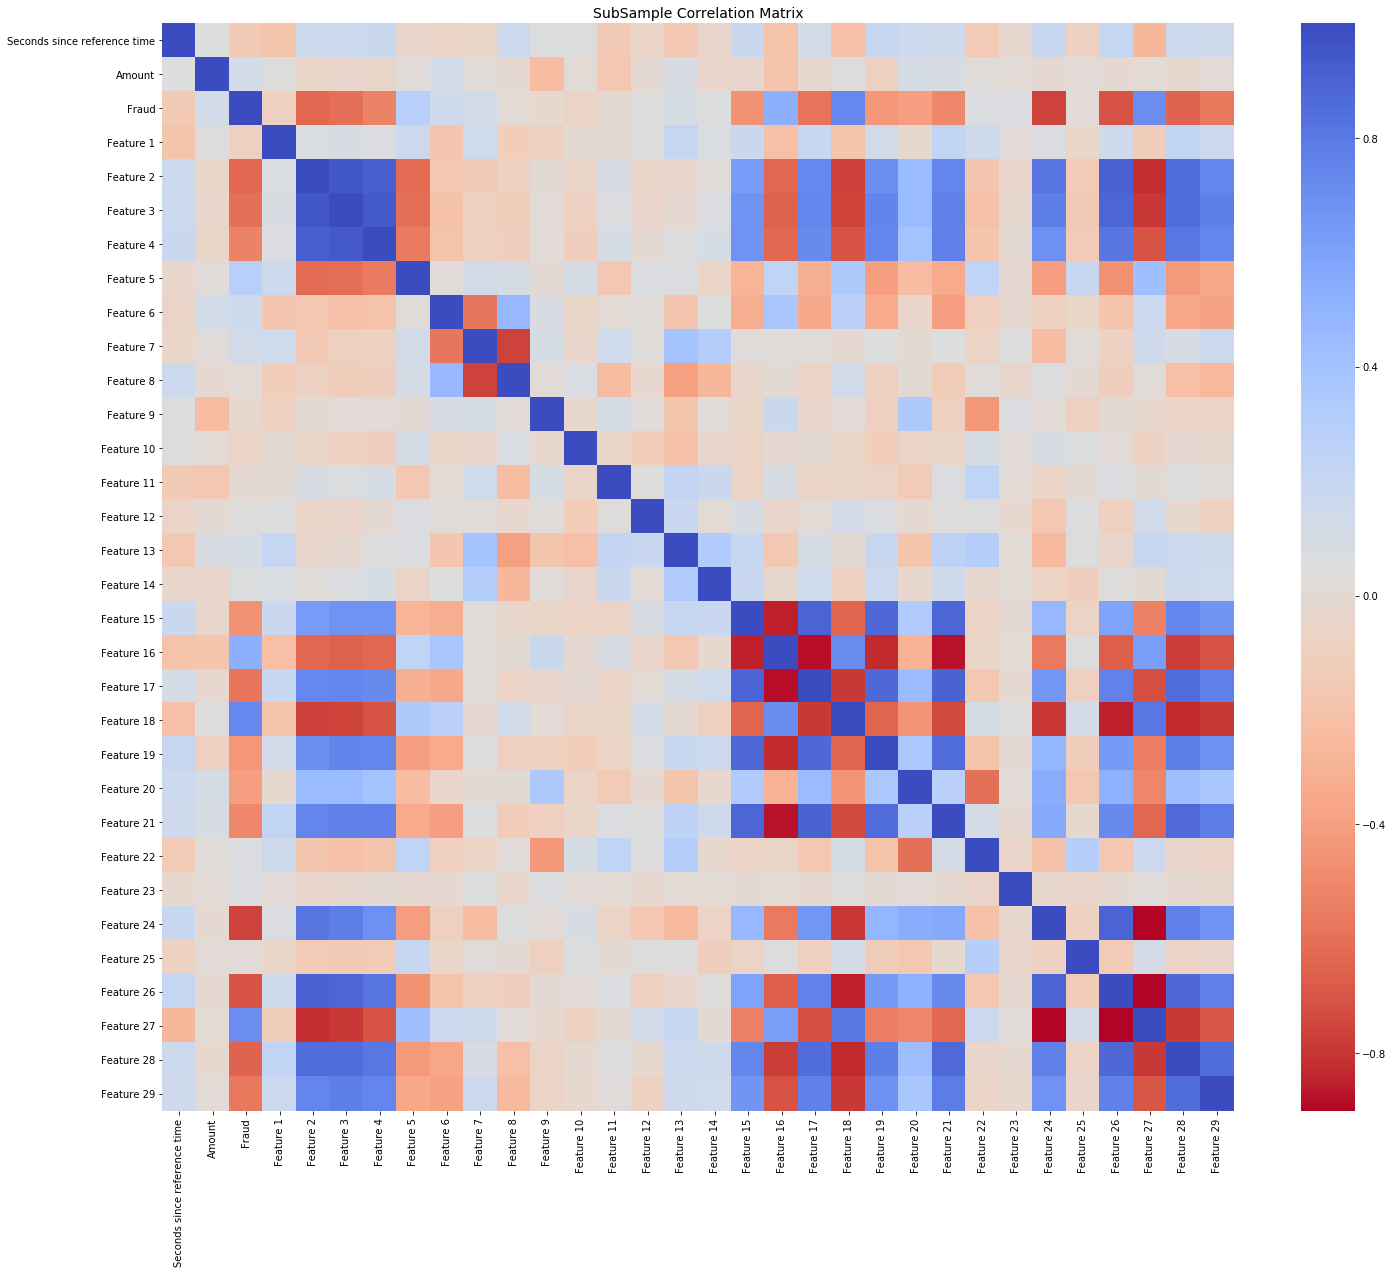

In [16]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = df_sample.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

<b>Negative Correlations</b>: Features (7 and 8), (15 and 16), (16 and 17), (16 and 21), (24 and 27), (26 and 27) are negatively correlated. <br/>
<b>Positive Correlations</b>:Features (2,3, and 4), (2 and 26), (15 and 21) are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

There are quite a few variables with a huge difference between the fraudulent and non-fraudulent data 

In [17]:
#Get number of fraud and not fraud values
fraud_rows = df['Fraud'].value_counts()
total_rows = df.shape[0]
percentage_fraud = fraud_rows[1]/total_rows

print("Fraud rows: ", fraud_rows[1])
print("Total rows: ", total_rows)
print("Percentage rows: ", percentage_fraud)

Fraud rows:  417
Total rows:  227844
Percentage rows:  0.0018301996102596514


<div class="alert alert-danger">
Since the dataset is quite imbalanced (fraud vs non-fraud), we will be using <b>SMOTE</b> to create some synthetic observations 
</div>

In [18]:
#Function to plot data. Will be used later
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [19]:
#We will be using SMOTE only on the training dataset. Thus, we need to split now
y = df['Fraud']
X = df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Data Resampling

In [20]:
method = SMOTE(kind='regular')

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

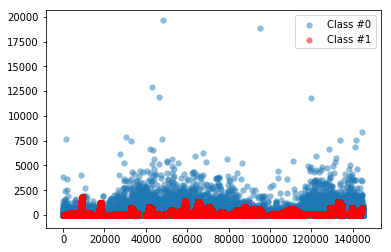

numpy.ndarray

In [21]:
plot_data(X_resampled, y_resampled)
type(X_resampled)

In [22]:
print("Before resampling")
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print("After resampling")
print(pd.value_counts(pd.Series(y_resampled)))

Before resampling
0.0    227427
1.0       417
Name: Fraud, dtype: int64
After resampling
1.0    159200
0.0    159200
dtype: int64


## Models to detect Fraud

### Random Forest

Random Forest before resampling:

In [23]:
model_rf = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model_rf.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_rf.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9130075734904867
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68227
         1.0       0.95      0.69      0.80       127

   micro avg       1.00      1.00      1.00     68354
   macro avg       0.97      0.85      0.90     68354
weighted avg       1.00      1.00      1.00     68354

[[68222     5]
 [   39    88]]
F SCORE 0.7999999999999999


In [24]:
tup = []
for i,j in zip(X.columns, model_rf.feature_importances_):
    tup.append((i, j))

sorted(tup, key=lambda x: x[1], reverse=True)


[('Feature 3', 0.19846439426172638),
 ('Feature 26', 0.18434913154395025),
 ('Feature 28', 0.14370774343365914),
 ('Feature 27', 0.07592189888995778),
 ('Feature 29', 0.048086561901922495),
 ('Feature 24', 0.03882571200207767),
 ('Feature 2', 0.03024685053466073),
 ('Feature 1', 0.022111753805011958),
 ('Feature 20', 0.018501274040468748),
 ('Feature 18', 0.01650093045898613),
 ('Feature 7', 0.016329497780151678),
 ('Feature 14', 0.01455561340134281),
 ('Feature 12', 0.014151898270134983),
 ('Feature 8', 0.013338232038024412),
 ('Feature 17', 0.01331547302591285),
 ('Feature 15', 0.013121418638705107),
 ('Feature 22', 0.013062307754693112),
 ('Feature 6', 0.012963450398158227),
 ('Feature 16', 0.011858154728792938),
 ('Feature 25', 0.011770214275933433),
 ('Feature 13', 0.011208805763554621),
 ('Feature 4', 0.009819163905744947),
 ('Feature 21', 0.009761236529861432),
 ('Feature 10', 0.009175284361562392),
 ('Amount', 0.008733378658491782),
 ('Feature 5', 0.008619811322862127),
 ('Seco

Random Forest after resampling

In [25]:
# Define the model as the random forest
model_rf_re = RandomForestClassifier(random_state=5)

# Fit the model to our resampled dataset
model_rf_re.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_rf_re.predict(X_test)

# Predict probabilities
probs = model_rf_re.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))
print("F SCORE", f1_score(y_test, predicted))

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KeyboardInterrupt: 

In [ ]:
tup = []
for i,j in zip(X.columns, model_rf_re.feature_importances_):
    tup.append((i, j))

tup = sorted(tup, key=lambda x: x[1], reverse=True)
print(tup)
least_valuable_features = [i[0] for i in tup[-1:-6:-1]]
least_valuable_features

#### Precision recall curves for Random Forest

10
50
100
250
500


KeyboardInterrupt: 

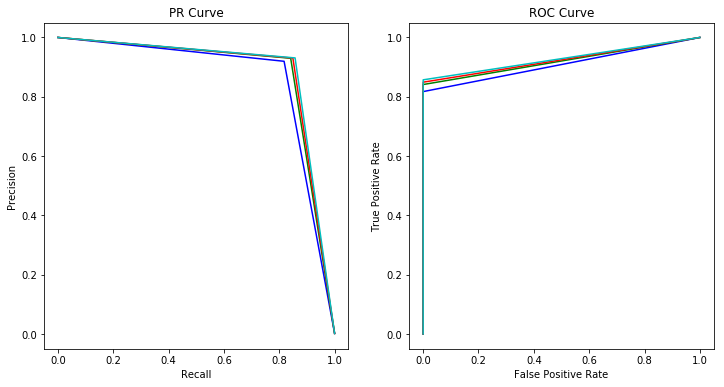

In [47]:
# Unsampled training data # rf_prec_recall_n_est_unsampled_unweighted
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for n_est,k in zip([10, 50, 100, 250, 500, 1000],'bgrcmy'):
    print(n_est)
    rf = RandomForestClassifier(n_estimators=n_est, bootstrap=False, max_features=0.33, n_jobs=4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    p,r,_ = precision_recall_curve(y_test, y_pred)
    tpr,fpr,_ = roc_curve(y_test, y_pred)
    
    ax1.plot(r,p,c=k,label=n_est)
    ax2.plot(tpr,fpr,c=k,label=n_est)

ax1.legend(loc='lower left')
ax2.legend(loc='lower left')
plt.show()
# Conclusion: n_estimators=100 is best

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


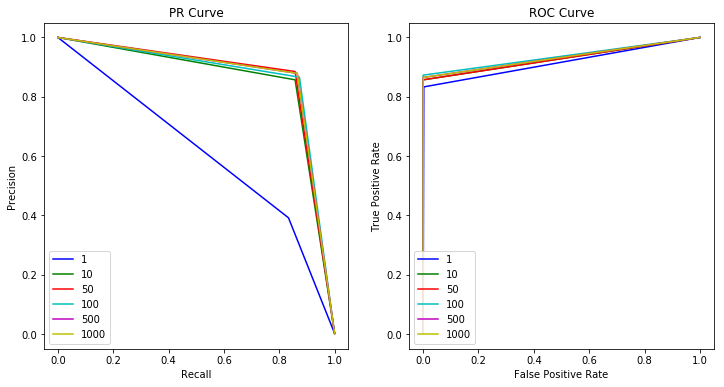

In [46]:
# Precision recall curve on resampled data
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for n_est,k in zip([1, 10, 50, 100, 500, 1000],'bgrcmy'):
    rf_adasyn_ = RandomForestClassifier(n_estimators=n_est, oob_score=True, n_jobs=4)
    rf_adasyn_.fit(X_resampled,y_resampled)
    y_pred = rf_adasyn_.predict(X_test)

    p,r,_ = precision_recall_curve(y_test, y_pred)
    tpr,fpr,_ = roc_curve(y_test, y_pred)
    
    ax1.plot(r,p,c=k,label=n_est)
    ax2.plot(tpr,fpr,c=k,label=n_est)

ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')
plt.show()
# Conclusion:

### Logistic Regression

In [ ]:
# Continue fitting the model and obtain predictions
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Get your performance metrics
predicted = model_lr.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

In [ ]:
# Continue fitting the model and obtain predictions
model_lr_re = LogisticRegression()
model_lr_re.fit(X_resampled, y_resampled)

# Get your performance metrics
predicted = model_lr_re.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

In [ ]:
#IMPROVEMENT - drop bottom 5 variables given by RF
new_df = df.copy()
new_df.drop(remove_names, axis=1, inplace=True)
new_df.shape

X = new_df.drop('Fraud', axis=1)
y = new_df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Continue fitting the model and obtain predictions
model_lr_new = LogisticRegression()
model_lr_new.fit(X_train, y_train)

# Get your performance metrics
predicted = model_lr_new.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

## Use Decision Tree 

In [ ]:
model_dt = DecisionTreeClassifier(random_state=5)

# Fit the model to our resampled dataset
model_dt.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model_dt.predict(X_test)

# Print the accuracy performance metric
# print(accuracy_score(y_test, predicted))

# Predict probabilities
probs = model_dt.predict_proba(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

In [ ]:
model_dt_re = DecisionTreeClassifier(random_state=5)

# Fit the model to our resampled dataset
model_dt_re.fit(X_resampled, y_resampled)

# Obtain predictions from the test data 
predicted = model_dt_re.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

### Use SVC

Or don't, cz it takes a while to run

In [ ]:
# Use GridSearchCV to find the best parameters.
# TAKES >10 MINUTES TO RUN


# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

In [ ]:
# TAKES >10 MINUTES TO RUN
# model_svc = SVC()

# #Train the model using the training sets
# model_svc.fit(X_train, y_train)

# #Predict the response for test dataset
# predicted = model_svc.predict(X_test)

# print('Classification report:\n', classification_report(y_test, predicted))
# conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
# print('Confusion matrix:\n', conf_mat)
# print("F SCORE", f1_score(y_test, predicted))

## Print all Confusion Matrices as heatmap

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted with training
y_pred_lr = model_lr.predict(X_test)
cf_lr = confusion_matrix(y_test, y_pred_lr)

# Logistic Regression fitted after resampling
y_pred_lr_re = model_lr.predict(X_test)
cf_lr_re = confusion_matrix(y_test, y_pred_lr_re)

#Random Forest after training
y_pred_rf = model_rf.predict(X_test)
cf_rf = confusion_matrix(y_test, y_pred_rf)

#Random Forest fitted after resampling
y_pred_rf_re = model_rf_re.predict(X_test)
cf_rf_re = confusion_matrix(y_test, y_pred_rf_re)

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(cf_lr, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_lr_re, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Log Reg with sampling \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cf_rf_re, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest with sampling \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

Probably convert the confusion matrix to like a normalised version so we can compare

## Try ensemble learning now

In [ ]:
#Basic Ensemble of the 3 classifiers
model_ensemble_2 = VotingClassifier(estimators=[('lr_re', model_lr_re), ('rf_re', model_rf_re)], voting='hard')
model_ensemble_2.fit(X_train,y_train)
model_ensemble_2.score(X_test,y_test)

predicted = model_ensemble_2.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

In [ ]:
#Basic Ensemble of the 3 classifiers
model_ensemble_4 = VotingClassifier(estimators=[('lr', model_lr), ('lr_re', model_lr_re), ('rf', model_rf), ('rf_re', model_rf_re)],
                                  voting='hard')
model_ensemble_4.fit(X_train,y_train)
model_ensemble_4.score(X_test,y_test)

predicted = model_ensemble_4.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print("F SCORE", f1_score(y_test, predicted))

So the ensemble did NOT work

## Evaluate Models

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


NameError: name 'ShuffleSplit' is not defined

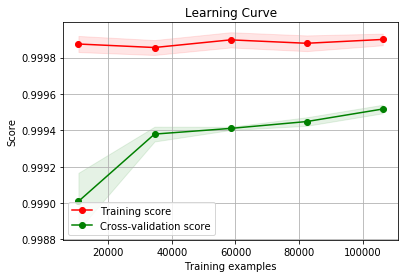

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title= "Learning Curve"
plot_learning_curve(model_rf, title, X_train, y_train)

plt.show()